In [ ]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 9.9 MB 19.7 MB/s 
     |████████████████████████████████| 233 kB 50.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
path = 'https://raw.githubusercontent.com/hqr999/Projeto-Dirigido/main/Ouro_Novo.xlsx%20-%20Planilha2(1).csv'
df =pd.read_csv(path)

In [ ]:
#Criação das variáveis que vamos usar no modelo de regressão linear
df['MM7D'] = df['Fechamento'].rolling(7).mean() #Primeira váriavel
df['MM30D'] = df['Fechamento'].rolling(30).mean() #Segunda váriavel
df['Retorno'] = df['Fechamento'].pct_change() # Terceira váriavel
df['Volatilidade'] = df['Retorno'].rolling(5).std() # Quarta váriavel(Volatilidade do retorno)

df.dropna(inplace=True)
df

,Data,Abertura,Máxima,Mínima,Fechamento,MM7D,MM30D,Retorno,Volatilidade
29,4/11/2017,127.480,127.80,126.000,127.500,125.735714,123.448667,0.011905,0.011558
30,4/12/2017,128.600,129.50,127.500,129.500,126.535714,123.625333,0.015686,0.011738
31,4/13/2017,128.490,129.00,128.490,129.000,127.178571,123.808667,-0.003861,0.011488
32,4/17/2017,128.000,128.40,126.500,126.550,127.500000,123.903667,-0.018992,0.014933
33,4/18/2017,127.000,128.60,127.000,128.600,127.807143,124.133667,0.016199,0.015315
...,...,...,...,...,...,...,...,...,...
1226,2/22/2022,308.000,309.50,305.000,305.000,311.571429,311.596400,-0.037855,0.047455
1227,2/23/2022,303.010,305.25,303.000,305.250,310.607143,311.054733,0.000820,0.046987
1228,2/24/2022,319.000,323.00,312.000,317.500,311.964286,310.964733,0.040131,0.037418
1229,2/25/2022,317.500,317.50,307.012,307.012,312.394571,310.498467,-0.033033,0.034038


In [ ]:
#Construção do alvo
df['Alvo'] = df['Fechamento'].shift(-1) #Alvo do modelo é o fechamento do dia seguinte.
df


,Data,Abertura,Máxima,Mínima,Fechamento,MM7D,MM30D,Retorno,Volatilidade,Alvo
29,4/11/2017,127.480,127.80,126.000,127.500,125.735714,123.448667,0.011905,0.011558,129.500
30,4/12/2017,128.600,129.50,127.500,129.500,126.535714,123.625333,0.015686,0.011738,129.000
31,4/13/2017,128.490,129.00,128.490,129.000,127.178571,123.808667,-0.003861,0.011488,126.550
32,4/17/2017,128.000,128.40,126.500,126.550,127.500000,123.903667,-0.018992,0.014933,128.600
33,4/18/2017,127.000,128.60,127.000,128.600,127.807143,124.133667,0.016199,0.015315,128.000
...,...,...,...,...,...,...,...,...,...,...
1226,2/22/2022,308.000,309.50,305.000,305.000,311.571429,311.596400,-0.037855,0.047455,305.250
1227,2/23/2022,303.010,305.25,303.000,305.250,310.607143,311.054733,0.000820,0.046987,317.500
1228,2/24/2022,319.000,323.00,312.000,317.500,311.964286,310.964733,0.040131,0.037418,307.012
1229,2/25/2022,317.500,317.50,307.012,307.012,312.394571,310.498467,-0.033033,0.034038,315.010


Text(0, 0.5, 'Frequência')

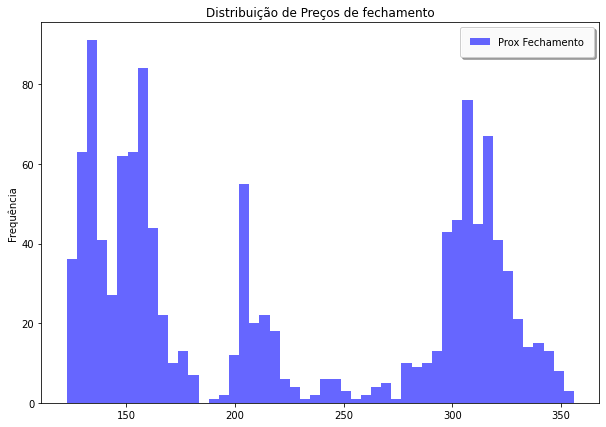

In [ ]:
#Gráfico de distribuição dos fechamentos
config = dict(histtype='stepfilled',alpha=0.6,density=False,bins=50)
plt.figure(figsize=(10,7))
plt.hist(df['Alvo'],**config,label='Prox Fechamento',color="blue")
plt.legend(loc='upper right'
,frameon=True
,ncol=2
,fancybox=True
,framealpha=0.95
,shadow=True
,borderpad=1)
plt.title('Distribuição de Preços de fechamento')
plt.ylabel("Frequência")

In [ ]:
#CORRELAÇÃO DAS VÁRIAVEIS ESCOLHIDAS COM ALVO
correl = df.corr()['Alvo'].drop(['Máxima','Mínima','Fechamento','Abertura','Alvo'])
correl

MM7D            0.997451
MM30D           0.991199
Retorno         0.006348
Volatilidade    0.214563
Name: Alvo, dtype: float64

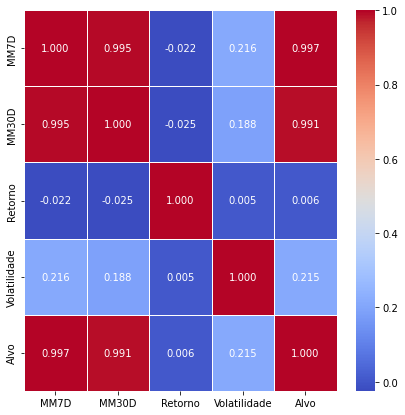

In [ ]:
#Mapa das correlações
correl_heatmap = df.drop(['Máxima','Mínima','Fechamento','Abertura'],axis=1).corr()
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(correl_heatmap,cmap='coolwarm',annot=True,linewidths=0.6,ax=ax,fmt='.3f');

In [ ]:
#ESTATISTICA DAS VÁRIAVEIS
df.drop(['Máxima','Mínima','Fechamento','Abertura'],axis=1).describe()

,MM7D,MM30D,Retorno,Volatilidade,Alvo
count,1202.000000,1202.000000,1202.000000,1202.000000,1201.000000
mean,220.832417,219.057130,0.000858,0.012343,221.373168
std,78.230820,78.045301,0.013845,0.006664,78.283959
min,123.200000,123.448667,-0.064610,0.001222,122.500000
25%,147.680357,148.815667,-0.006661,0.007796,148.000000
50%,204.202929,204.015033,0.000334,0.010975,204.001000
75%,307.173821,308.464783,0.007944,0.015239,306.000000
max,346.328571,340.342000,0.077999,0.047455,356.000000


In [ ]:
qntd_linhas = len(df)
linhas_treino = round(.60*qntd_linhas) #(50$ da minha base em treino)
linhas_teste  = qntd_linhas-1


info = (
    f' numero de linhas treino = 0:{linhas_treino}'
    f'numero de linhas teste = {linhas_treino}:{linhas_treino+linhas_teste -1}'
    
)
info

' numero de linhas treino = 0:721numero de linhas teste = 721:1921'

In [ ]:
#Separação da base de dados
df_train = df.loc[0:721]
df_test = df.loc[721:]


#Alocação dos mesmos em váriavéis
x_train = df_train.iloc[:,5:9]
y_train = df_train['Alvo']

x_teste = df_test.iloc[:,5:9]
y_teste = df_train['Alvo']

In [ ]:
#Treinando o modelo
x_treino_ = sm.add_constant(x_train)
x_teste_ = sm.add_constant(x_teste)

reg_sm = sm.OLS(y_train,x_treino_).fit() #Linha que treina o modelo

y_pred_treino = reg_sm.predict(x_treino_)
y_pred_teste = reg_sm.predict(x_teste_)
reg_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Alvo   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.596e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:25:59   Log-Likelihood:                -1698.9
No. Observations:                 693   AIC:                             3408.
Df Residuals:                     688   BIC:                             3431.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2551      0.672     -0.379      0.704      -1.575       1.065
MM7D             1.0955      0.026     41.485      0.000       1.044       1.147
MM30D           -0.0953      0.027     -3.499      0.000      -0.149      -0.042
Retorno        108.8444      8.880     12.258      0.000      91.410     126.279
Volatilidade    45.6480     19.912      2.293      0.022       6.553      84.743
==============================================================================
Omnibus:                      129.576   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1551.138
Skew:                           0.429   Prob(JB):                         0.00
Kurtosis:                      10.279   Cond. No.                     4.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Resultados : Real x previsto
resultados = pd.DataFrame({'Real':y_teste,'Previsto':y_pred_treino,'Fechamento':df['Fechamento']})

#Para medir a acurácia
#resultados['Defasagem_Real'] = resultados['Real'].shift(-1)
#resultados['Defasagem_Previsto'] = resultados['Previsto'].shift(-1)
#resultados['Real_Dir'] = np.where(resultados['Real']>resultados['Defasagem_Real'],1,0)
#resultados['Prev_Dir'] = np.where(resultados['Previsto']>resultados['Defasagem_Previsto'],1,0)
resultados.head(20)

,Real,Previsto,Fechamento
29,129.500,127.554194,127.500
30,129.000,128.833569,129.500
31,126.550,127.381351,129.000
32,128.600,126.234725,126.550
33,128.000,130.397114,128.600
34,128.300,128.167910,128.000
35,127.200,129.168096,128.300
36,127.999,127.931830,127.200
37,129.000,129.135276,127.999
38,129.100,129.155575,129.000


In [ ]:
resultados.describe()


,Real,Previsto,Fechamento
count,693.000000,693.000000,1202.000000
mean,158.141938,158.141938,221.295071
std,27.221218,27.075756,78.298191
min,122.500000,123.010485,122.500000
25%,135.300000,135.316831,148.000000
50%,153.000000,153.200616,204.000500
75%,165.990000,165.542451,306.000000
max,224.900000,223.220754,356.000000


Text(0, 0.5, 'Fechamento real')

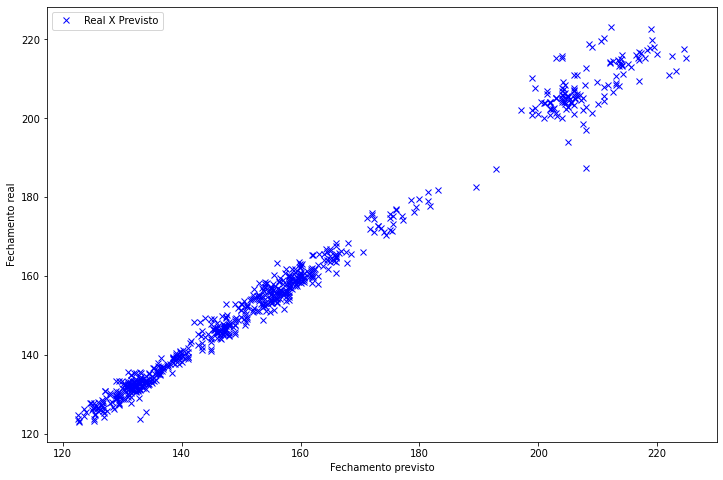

In [ ]:
#Gráfico de dispersão do preço real x preço previsto(quanto mais próximo de uma linha de 45 graus >})
plt.figure(figsize=(12,8))
plt.plot(y_teste,y_pred_treino,'x',color='blue',label='Real X Previsto')
plt.legend()
plt.xlabel('Fechamento previsto')
plt.ylabel('Fechamento real')



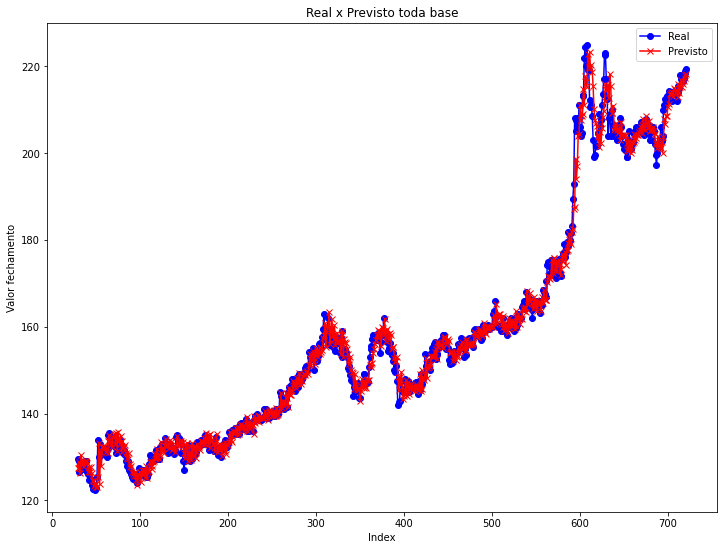

In [ ]:
#Plotagem de toda base
plt.figure(figsize=(12,9))
plt.title("Real x Previsto toda base")
plt.plot(y_teste,label = "Real", color = "blue", marker = 'o')
plt.plot(y_pred_treino,label = "Previsto", color = "red",marker='x')
plt.xlabel("Index")
plt.ylabel("Valor fechamento")
plt.legend()


In [ ]:
reg_sm.params

const            -0.255149
MM7D              1.095513
MM30D            -0.095255
Retorno         108.844397
Volatilidade     45.648008
dtype: float64

A FÓRMULA DA NOSSA REGRESSÃO É :
Y = -0.255149 + 1.095513 *(VALOR DA MM7D) -0.095255 * (VALOR DA MM30D) + 108.844397*(VALOR DO RETORNO) + 45.648008 * (VOLATILIDADE)


In [ ]:
def formula_(mm7d,mm30d,retorno,volatilidade):
     formula = -0.255149 + 1.095513 * (mm7d) - 0.095255 * (mm30d)	 +108.844397*(retorno)+45.648008*(volatilidade)
     return formula


In [ ]:
#Só colocar os parametrôs que a fórmula prevê o resultado. ( Testando o index 33)
formula_(127.80714285714,124.13366666666,0.0161991307783,0.0153145058281)

130.39714638056665

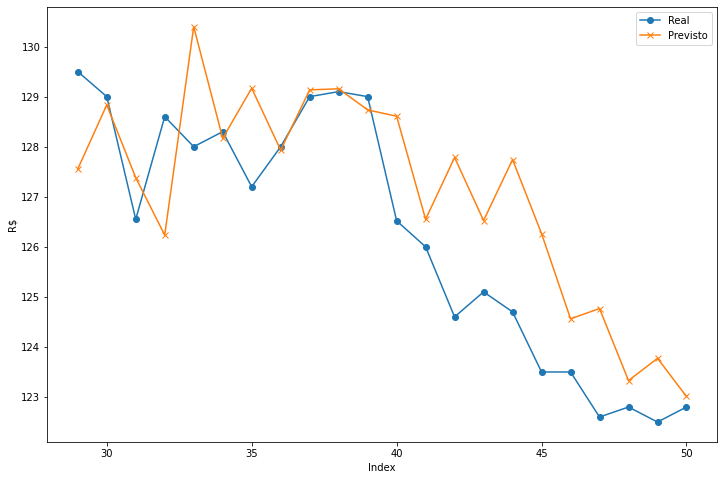

In [ ]:
#Gráfico mais ampliado das 50 primeiras previsões
plt.figure(figsize=(12,8))
plt.plot(resultados['Real'].loc[:50],marker='o',label='Real')
plt.plot(resultados['Previsto'].loc[:50],marker='x',label='Previsto')
plt.xlabel('Index')
plt.ylabel('R$')
plt.legend()

In [ ]:
#Tabela com resultados .
resultados.head()

,Real,Previsto,Fechamento
29,129.50,127.554194,127.50
30,129.00,128.833569,129.50
31,126.55,127.381351,129.00
32,128.60,126.234725,126.55
33,128.00,130.397114,128.60


In [ ]:
var = df.drop(['Máxima','Mínima','Fechamento','Abertura'],axis=1).describe()

<AxesSubplot:xlabel='Alvo'>

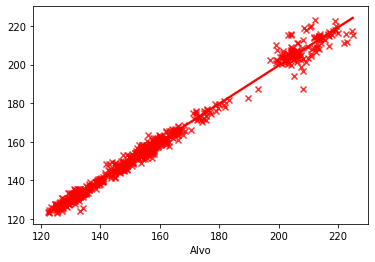

In [ ]:
sns.regplot(x=y_teste , y=y_pred_treino,data=df_train,color='red',marker='x')



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=416be4a5-1e2e-4be1-bf29-bebc5e018d70' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>